\begin{align*}

P [X = n] =  \frac{\lambda^n} {n!} · e^{-\lambda}

\end{align*}


lambda ... průměrný počet výskytů jevu za sledované období

Poissonovo rozdělení popisuje pravděpodobnost, že dojde k řídkému jevu.
Například mám obchod a v něm přijde 100 lidí za den, mne zajímá, že v dalších 10 minutách přijdou 3 lidi, tak to je ono.
Koukám na padající hvězdy, padají 3 hvězdy za minutu. Jaká je pravděpodobnost, že v dašlích 20 minutách spadnou 2 meteory?

Něco dějící se v čase, náhodně.

In [13]:
from math import factorial as f, exp as e
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

def memberProbabilityPoisson(selectedMember: int, Lambda: float) -> float:
    citatel: float = Lambda**selectedMember
    jmenovatel: int = f(selectedMember)
    nasobic: float = e(-Lambda)
    result: float = (citatel/jmenovatel)*nasobic
    #print(selectedMember, Lambda)
    #print(citatel, jmenovatel, nasobic, result)
    return result



Průměrně spadne 20 meteorů za hodinu. \
Jaká je pravděpodobnost, že v následujících 10 minutách spadnou 3 meteory.

-> 20 met/60 min
-> (20/6) met/10 min je lambda

In [14]:
timeDuration: float = 10.
meteorRateHourly: float = 20.
meteorRate10min: float = meteorRateHourly/6.
wantedMeteors: int = 3
Lambda:float = meteorRate10min

probability:float = memberProbabilityPoisson(selectedMember= wantedMeteors, Lambda=Lambda)
print(f"Pravdepodobnost, ze spadne {wantedMeteors} meteorů za {timeDuration} minut je {probability:.2%}")

Pravdepodobnost, ze spadne 3 meteorů za 10.0 minut je 22.02%


Jaká je pravděpodobnost, že spadne maximálně 12 meteorů?

Probabilities: [0.035673993347252395, 0.11891331115750799, 0.19818885192917998, 0.2202098354768667, 0.18350819623072223, 0.12233879748714817, 0.0679659986039712, 0.03236476123998629, 0.013485317183327622, 0.0049945619197509705, 0.0016648539732503236, 0.0005045012040152495, 0.00014013922333756934, 3.593313418912035e-05, 8.55550814026675e-06, 1.9012240311703889e-06, 3.9608833982716437e-07, 7.766438035826753e-08, 1.438229265893843e-08, 2.523209238410251e-09]
Probability for maximum of 5 meteors falling in 10.0 minutes: 75.65%


C:\Users\tomas.prejda\AppData\Local\Temp\ipykernel_17820\3485076629.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


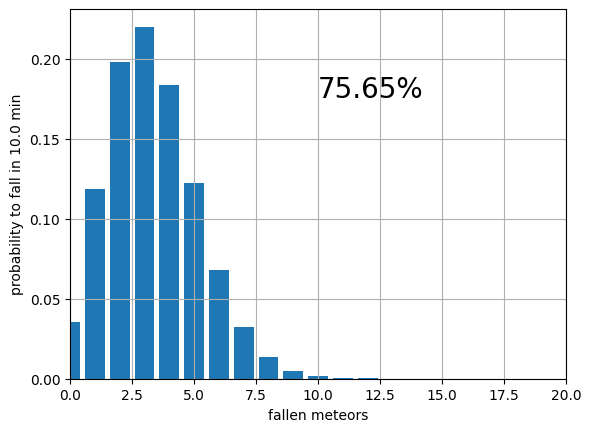

In [17]:
timeDuration: float = 10.
meteorRateHourly: float = 20.
meteorRate10min: float = meteorRateHourly/6.
wantedMeteors: int = 5
Lambda:float = meteorRate10min

probabilities:list[float] = [memberProbabilityPoisson(selectedMember= meteorIndex, Lambda=Lambda) for meteorIndex in range(int(meteorRateHourly))]
probability_max5mets_10minutes = sum(probabilities[:wantedMeteors])

print(f"Probabilities: {probabilities}")
print(f"Probability for maximum of {wantedMeteors} meteors falling in {timeDuration} minutes: {probability_max5mets_10minutes:.2%}")

fig: Figure
axes: Axes

fig, axes = plt.subplots(1,1)

axes.bar(range(int(meteorRateHourly)), probabilities)
axes.text(x=meteorRateHourly//2, y=max(probabilities)*0.8, s=f"{probability_max5mets_10minutes:.2%}", fontsize=20)
axes.grid()
axes.set_xlabel("fallen meteors")
axes.set_ylabel(f"probability to fall in {timeDuration} min")
axes.set_xlim((0, meteorRateHourly))
fig.show()